In [1]:
#| output: false
import smile_extract
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from pathlib import Path
%matplotlib inline

trialframe_dir = Path('../data/trialframe')
dataset = 'Prez_2022-07-21'
composition_config_path = Path('../conf/trialframe.yaml')

In [79]:
composition_config = OmegaConf.load(composition_config_path)
tf = smile_extract.compose_from_frames(
    meta=pd.read_parquet(trialframe_dir / dataset / f'{dataset}_{composition_config.info}.parquet'),
    trialframe_dict={
        'state': pd.read_parquet(trialframe_dir / dataset / f'{dataset}_states.parquet'),
        'hand position': pd.read_parquet(trialframe_dir / dataset / f'{dataset}_hand-pos.parquet'),
        'binned rates': pd.read_parquet(trialframe_dir / dataset / f'{dataset}_neural-spikes-binned.parquet')/10e-3, # convert to Hz
        'smooth rates': pd.read_parquet(trialframe_dir / dataset / f'{dataset}_neural-smooth-rates.parquet'),
        'lfads rates': pd.read_parquet(trialframe_dir / dataset / f'{dataset}_neural-lfads-rates.parquet'),
    }
)
tf

signal                                  monkey session date  \
channel                                                       
block   trial_id time                                         
cst-rtt 1        0 days 00:00:00          Prez   2022-07-21   
                 0 days 00:00:00.010000   Prez   2022-07-21   
                 0 days 00:00:00.020000   Prez   2022-07-21   
                 0 days 00:00:00.030000   Prez   2022-07-21   
                 0 days 00:00:00.040000   Prez   2022-07-21   
...                                        ...          ...   
        400      0 days 00:00:05.950000   Prez   2022-07-21   
                 0 days 00:00:05.960000   Prez   2022-07-21   
                 0 days 00:00:05.970000   Prez   2022-07-21   
                 0 days 00:00:05.980000   Prez   2022-07-21   
                 0 days 00:00:05.990000   Prez   2022-07-21   

signal                                       trial datetime task   result  \
channel                                                                     
block   trial_id time                                                       
cst-rtt 1        0 days 00:00:00        2022-07-21 08:28:01  CST  success   
                 0 days 00:00:00.010000 2022-07-21 08:28:01  CST  success   
                 0 days 00:00:00.020000 2022-07-21 08:28:01  CST  success   
                 0 days 00:00:00.030000 2022-07-21 08:28:01  CST  success   
                 0 days 00:00:00.040000 2022-07-21 08:28:01  CST  success   
...                                                     ...  ...      ...   
        400      0 days 00:00:05.950000 2022-07-21 09:18:06  RTT  failure   
                 0 days 00:00:05.960000 2022-07-21 09:18:06  RTT  failure   
                 0 days 00:00:05.970000 2022-07-21 09:18:06  RTT  failure   
                 0 days 00:00:05.980000 2022-07-21 09:18:06  RTT  failure   
                 0 days 00:00:05.990000 2022-07-21 09:18:06  RTT  failure   

signal                                             state hand position  \
channel                                                              x   
block   trial_id time                                                    
cst-rtt 1        0 days 00:00:00         Reach to Center     87.491912   
                 0 days 00:00:00.010000  Reach to Center     87.469056   
                 0 days 00:00:00.020000  Reach to Center     87.439185   
                 0 days 00:00:00.030000  Reach to Center     87.415315   
                 0 days 00:00:00.040000  Reach to Center     87.402561   
...                                                  ...           ...   
        400      0 days 00:00:05.950000   Center Failure    269.959956   
                 0 days 00:00:05.960000   Center Failure    269.958383   
                 0 days 00:00:05.970000   Center Failure    269.954549   
                 0 days 00:00:05.980000   Center Failure    269.952290   
                 0 days 00:00:05.990000   Center Failure    269.954555   

signal                                                          binned rates  \
channel                                           y           z        ch1u1   
block   trial_id time                                                          
cst-rtt 1        0 days 00:00:00         619.951447 -130.308794        100.0   
                 0 days 00:00:00.010000  619.949176 -130.281867          0.0   
                 0 days 00:00:00.020000  619.957786 -130.279259        100.0   
                 0 days 00:00:00.030000  619.952311 -130.301029          0.0   
                 0 days 00:00:00.040000  619.936980 -130.306830          0.0   
...                                             ...         ...          ...   
        400      0 days 00:00:05.950000  589.363515 -222.739631          0.0   
                 0 days 00:00:05.960000  589.363922 -222.746128          0.0   
                 0 days 00:00:05.970000  589.368569 -222.740542        100.0   
                 0 days 00:00:05.980000  

In [80]:
from src.time_slice import reindex_trial_from_event, slice_by_time
preproc = (
    tf
    .set_index(['task','result','state'], append=True)
    .xs(level='result', key='success')
    .groupby('trial_id', group_keys=False)
    .apply(reindex_trial_from_event, event='Hold Center (Ambiguous Cue)')
)
preproc

signal                                                         monkey  \
channel                                                                 
block   trial_id time                     task state                    
cst-rtt 1        -1 days +23:59:57.670000 CST  Reach to Center   Prez   
                 -1 days +23:59:57.680000 CST  Reach to Center   Prez   
                 -1 days +23:59:57.690000 CST  Reach to Center   Prez   
                 -1 days +23:59:57.700000 CST  Reach to Center   Prez   
                 -1 days +23:59:57.710000 CST  Reach to Center   Prez   
...                                                               ...   
        393      0 days 00:00:04.810000   RTT  Success           Prez   
                 0 days 00:00:04.820000   RTT  Success           Prez   
                 0 days 00:00:04.830000   RTT  Success           Prez   
                 0 days 00:00:04.840000   RTT  Success           Prez   
                 0 days 00:00:04.850000   RTT  Success           Prez   

signal                                                         session date  \
channel                                                                       
block   trial_id time                     task state                          
cst-rtt 1        -1 days +23:59:57.670000 CST  Reach to Center   2022-07-21   
                 -1 days +23:59:57.680000 CST  Reach to Center   2022-07-21   
                 -1 days +23:59:57.690000 CST  Reach to Center   2022-07-21   
                 -1 days +23:59:57.700000 CST  Reach to Center   2022-07-21   
                 -1 days +23:59:57.710000 CST  Reach to Center   2022-07-21   
...                                                                     ...   
        393      0 days 00:00:04.810000   RTT  Success           2022-07-21   
                 0 days 00:00:04.820000   RTT  Success           2022-07-21   
                 0 days 00:00:04.830000   RTT  Success           2022-07-21   
                 0 days 00:00:04.840000   RTT  Success           2022-07-21   
                 0 days 00:00:04.850000   RTT  Success           2022-07-21   

signal                                                              trial datetime  \
channel                                                                              
block   trial_id time                     task state                                 
cst-rtt 1        -1 days +23:59:57.670000 CST  Reach to Center 2022-07-21 08:28:01   
                 -1 days +23:59:57.680000 CST  Reach to Center 2022-07-21 08:28:01   
                 -1 days +23:59:57.690000 CST  Reach to Center 2022-07-21 08:28:01   
                 -1 days +23:59:57.700000 CST  Reach to Center 2022-07-21 08:28:01   
                 -1 days +23:59:57.710000 CST  Reach to Center 2022-07-21 08:28:01   
...                                                                            ...   
        393      0 days 00:00:04.810000   RTT  Success         2022-07-21 09:17:23   
                 0 days 00:00:04.820000   RTT  Success         2022-07-21 09:17:23   
                 0 days 00:00:04.830000   RTT  Success         2022-07-21 09:17:23   
                 0 days 00:00:04.840000   RTT  Success         2022-07-21 09:17:23   
                 0 days 00:00:04.850000   RTT  Success         2022-07-21 09:17:23   

signal                                                         hand position  \
channel                                                                    x   
block   trial_id time                     task state                           
cst-rtt 1        -1 days +23:59:57.670000 CST  Reach to Center     87.491912   
                 -1 days +23:59:57.680000 CST  Reach to Center     87.469056   
                 -1 days +23:59:57.690000 CST  Reach to Center     87.439185   
                 -1 days +23:59:57.700000 CST  Reach to Center     87.415315   
                 -1 days +23:59:57.710000 CST  Reach to Center     87.402561   
...                      

/var/folders/wf/m89rq9p97kq6fdqj23hkrm_h0000gn/T/ipykernel_48256/3643990781.py:18: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  preproc


<Axes: xlabel='time', ylabel='ch3u1'>

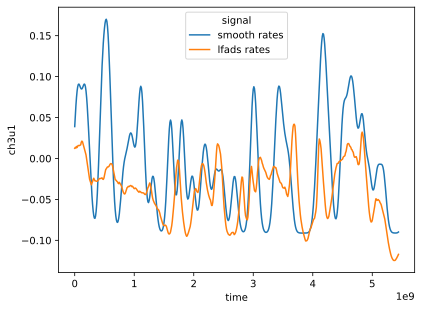

In [84]:
from sklearn.pipeline import make_pipeline
from src.crystal_models import SoftnormScaler, BaselineShifter, JointSubspace

neural_pipeline = make_pipeline(
    SoftnormScaler(),
    BaselineShifter(
        ref_event='Hold Center (Ambiguous Cue)',
        ref_slice=slice('-0.3s', '-0.05s'),
    ),
    # ('joint_subspace', JointSubspace(
    #     n_components=2,
    #     n_jobs=-1,
    #     random_state=42,
    # )),
)

rates = (
    preproc
    [['smooth rates', 'lfads rates']]
    .pipe(neural_pipeline.fit_transform)
    .pipe(slice_by_time, time_slice=slice('0s',None))
    .stack(level='signal')
)
sns.lineplot(
    data=(
        rates
        .groupby('trial_id')
        .get_group(380)
    ),
    x='time',
    y='ch3u1',
    hue='signal',
    hue_order=['smooth rates', 'lfads rates'],
)

In [83]:
neural_pipeline

TypeError: not all arguments converted during string formatting

TypeError: not all arguments converted during string formatting

Pipeline(steps=[('tuple-1', ('softnorm', SoftnormScaler())),
                ('tuple-2',
                 ('baseline',
                  BaselineShifter(ref_event='Hold Center (Ambiguous Cue)',
                                  ref_slice=slice('-0.3s', '-0.05s', None))))])

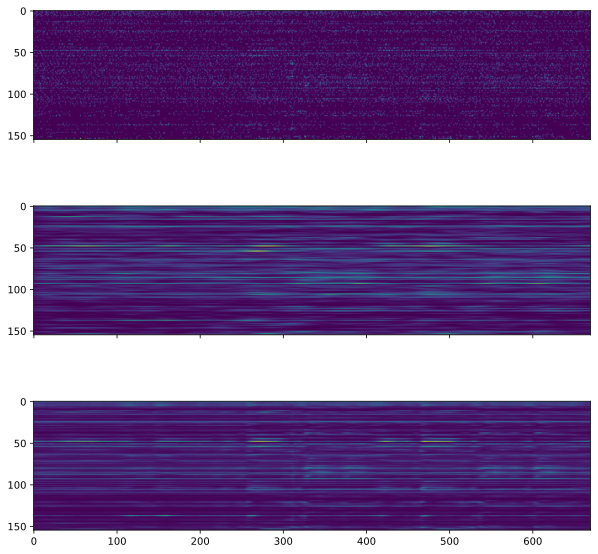

In [39]:
# g = sns.FacetGrid(
#     data=(
#         rates
#         .groupby('trial_id')
#         .get_group(2)
#         .reset_index(level='signal')
#     ),
#     row='signal',
# )
# 
# g.map_dataframe(sns.heatmap)

def plot_rates(rates, trial_id, signal, ax: plt.Axes):
    rates = (
        rates
        .xs(level='trial_id', key=trial_id)
        .xs(level='signal', key=signal)
        .reset_index(level=['block','task'], drop=True)
    )
    ax.imshow(
        rates.T,
        cmap='viridis',
    )
    
fig, ax = plt.subplots(3,1,figsize=(10,10),sharex=True, sharey=True)
plot_rates(rates, 2, 'binned rates', ax[0])
plot_rates(rates, 2, 'smooth rates', ax[1])
plot_rates(rates, 2, 'lfads rates', ax[2])

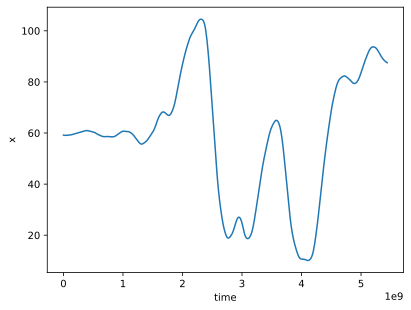

In [58]:
%matplotlib inline
sns.lineplot(
    data=(
        preproc
        ['hand position']
        .xs(level='trial_id', key=380)
    ),
    x='time',
    y='x',
)
plt.show()

In [70]:
num_indices_before_time = tf.index.names.index('time')

num_indices_before_time*(slice(None),) + (slice('0s', None),)

(slice(None, None, None), slice(None, None, None), slice('0s', None, None))